# Exercise1: EDA operations on Haberman's Survival Data


# Introduction
In this exercise,EDA(Exploratory Data Analysis) is performed on Haberman's Survival DataSet to analyze the dataset's main characteristics in visual way.The dataset is about survival of patients who had undergone surgery for breast cancer.
### Objective:
* To predict and analyze the data regarding the survival of patients who had undergone breast cancer based on the patient's age, year of treatment and the number of positive lymph nodes.
* To visualize the data

### Data Description:
* The dataset is a case study of survival of patients who had undergone surgery for breast cancer.
* Case Study was conducted from 1958 to 1970 at the University of Chicago's Billings Hospital.
* Data contains the information regarding Age ,Operation_Year,axil_nodes ,Surv_status of patient.








In [1]:
# Import all required modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df12 = pd.read_csv('haberman.csv')  # Reading CSV file
print(df12.head(5)) # Displaying the first 5 datas from the dataset


   30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1


In [3]:
#data-points and features 
print(df12.shape)


(305, 4)


In [4]:
print(df12.columns)


Index(['30', '64', '1', '1.1'], dtype='object')


#### Observations:

Here,column's name is 30 ,64,1,1.1 . 
* 30 represents Age (Age of patient at time of operation) 
* 64 represents Year of operation  (Patient's year of operation (year - 1900)
* 1 represents axial_nodes  (Number of positive axillary nodes detected)
* 1.1 represetns surv_stats (Survival status )

#### Positive axillary nodes:
A positive axillary lymph node is a lymph node in the area of the armpit (axillary) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.(https://en.wikipedia.org/wiki/Positive_axillary_lymph_node)

#### Class attribute  of Survival status :
* 1  : patient survived 5 years or longer 
* 2  : patient died within 5 years
Assume, If  patient has survived 5 year or more ,class attribute = "yes" and if patient died within 5 years ,class attribute ="no".




In [60]:
df12.columns= ['age','year','+lymph_node','surv_status'] # give the column names for better understanding
print(df12.columns)
#print(list(df12['surv_status']))



Index(['age', 'year', '+lymph_node', 'surv_status'], dtype='object')


In [6]:
df12['surv_status']= df12['surv_status'].map({1:"yes", 2:"no"})# map function is used to convert 1 & 2 values into yes & no values
# check the surv_status column's values
print(df12.iloc[50:60, 3])


50    yes
51    yes
52     no
53     no
54    yes
55    yes
56    yes
57    yes
58    yes
59    yes
Name: surv_status, dtype: object


In [7]:
print(df12.iloc[:,-1].value_counts())# To check the number of people who have survived
print(df12.iloc[:,0].value_counts()) # to check the counts of particular age

yes    224
no      81
Name: surv_status, dtype: int64
52    14
54    13
50    12
43    11
47    11
53    11
57    11
55    10
38    10
49    10
65    10
41    10
42     9
61     9
45     9
63     8
59     8
44     7
62     7
58     7
70     7
56     7
46     7
48     7
34     7
67     6
51     6
37     6
39     6
60     6
66     5
64     5
72     4
69     4
40     3
36     2
35     2
33     2
31     2
30     2
68     2
73     2
74     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64


# Mean, Variance and Std-dev

In [8]:
# Mean, Variance and Std-dev with simple command
print(df12.info())# information about data
print(df12.describe())# df12.describe() is used to calculate count,mean,varience,
# standard deviations,mimimum ,maximum vaue and 25,50,75 percentile.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age            305 non-null int64
year           305 non-null int64
+lymph_node    305 non-null int64
surv_status    305 non-null object
dtypes: int64(3), object(1)
memory usage: 8.4+ KB
None
              age        year  +lymph_node
count  305.000000  305.000000   305.000000
mean    52.531148   62.849180     4.036066
std     10.744024    3.254078     7.199370
min     30.000000   58.000000     0.000000
25%     44.000000   60.000000     0.000000
50%     52.000000   63.000000     1.000000
75%     61.000000   66.000000     4.000000
max     83.000000   69.000000    52.000000


#### Observations
* Mean and standard deviation:-
       * Age: As mean is greater than std, most of the data is clustered  about mean
       * year: std is very small,It idicates that almost all data is clustered about mean.
       * +lymph_node : Std is greater than mean, it indicates the data are more spread out.
* Datasets contains small amount of data(305)
* Breast cancer is found at age of 30(minimum) and 83(maximum)
* Maximum positive auxillary lymph node is 52
* 225 patients after operation is survived and 81 are not.


# 2-D Scatter Plot:


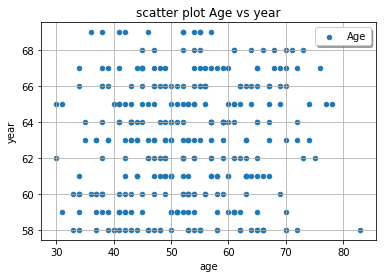

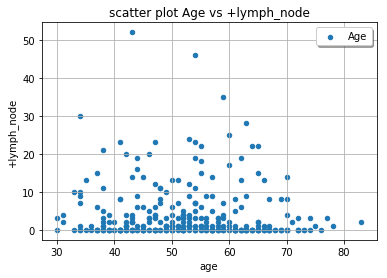

In [11]:
# scatter plot between age and year
df12.plot( kind='scatter',x='age',y='year') 
plt.grid()
plt.title('scatter plot Age vs year')
plt.legend(["Age"],fancybox=True, shadow=True)
plt.show()
#scatter plot between age and +lymph_node

df12.plot( kind='scatter',x= 'age',y='+lymph_node')
plt.grid()
plt.title('scatter plot Age vs +lymph_node')
plt.legend(["Age"],fancybox=True, shadow=True)
plt.show()

#### observations:
From above scatter plot,we are unable to destinction anything.Let us check for data is coloured.

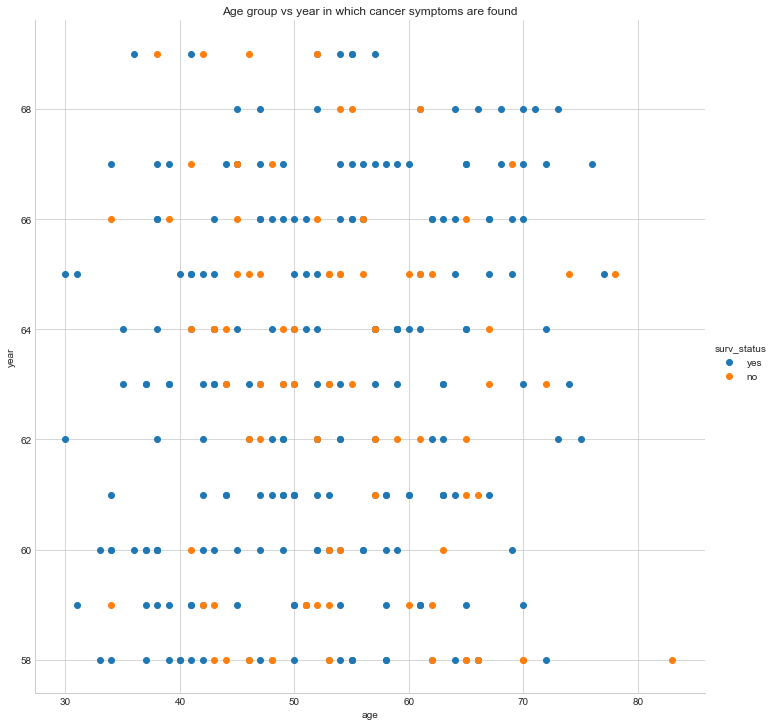

In [16]:
#2D scatter plot with color coding
sns.set_style("whitegrid");
sns.FacetGrid(df12,hue="surv_status",size=10) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.title('Age group vs year in which cancer symptoms are found')
plt.show()
#here,Age group from 37 to 53 is difficult to distinguish 


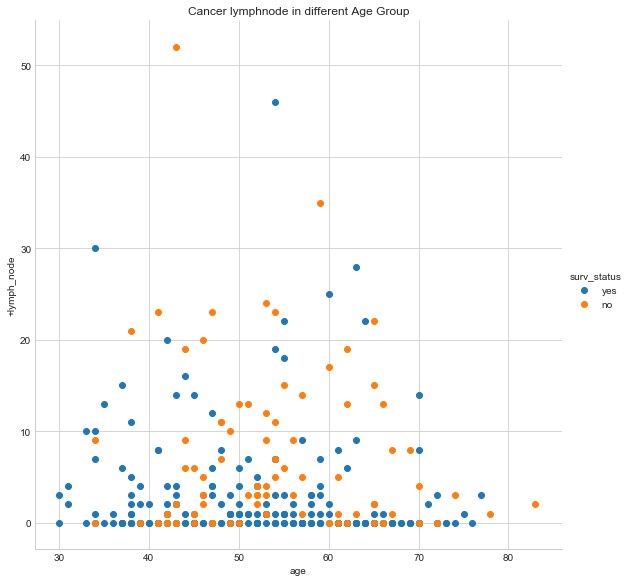

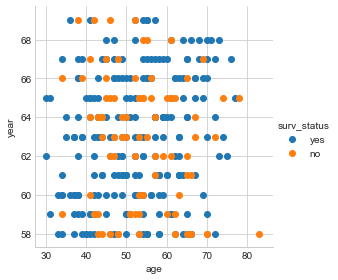

In [15]:
#2D scatter plot with color coding 
sns.set_style("whitegrid");
sns.FacetGrid(df12,hue="surv_status",size=8) \
   .map(plt.scatter, "age", "+lymph_node") \
   .add_legend()
plt.title('Cancer lymphnode in different Age Group')
plt.show()
# here, we can easily distinguish between other age groups and lyumph node except age group 40 to 50
#
sns.set_style("whitegrid");
sns.FacetGrid(df12,hue="surv_status",size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.title('')
plt.show()

#### Observations:
* Age group from 69 to 83 ,age group 30 , age group 31 to 40 can easily be distinguish but it is difficult for age group 41 to 53 in lymph_node and age graph
* From these plots, we are unable to predict patient's survival .
* These plots helps us to know in which particular age women should take care of themself.
* From above plots,womens in age 37 to 50 is operated and found symptoms of breast cancer.
 

In [12]:
## Pair-plot

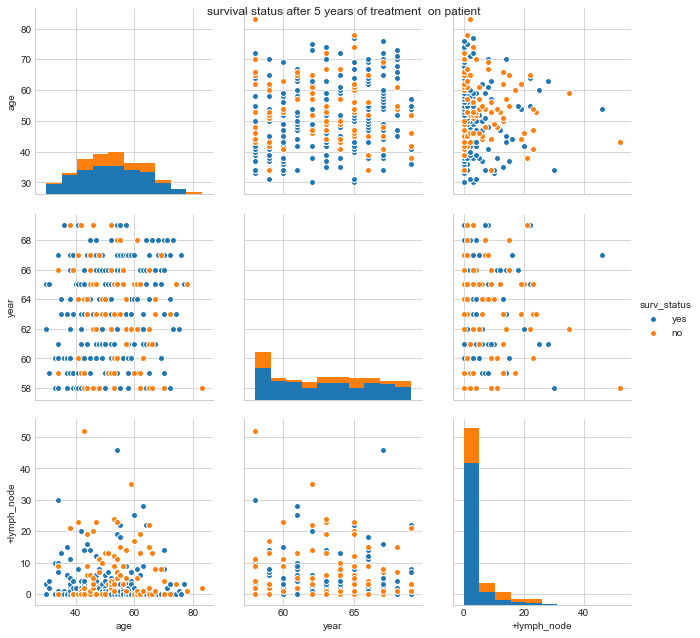

In [26]:
#pair plot with survival status after 5 years of treatment  on patient

plt.close();

sns.set_style("whitegrid");
g= sns.pairplot(df12, hue='surv_status', size=3)
g.fig.suptitle('survival status after 5 years of treatment  on patient')

plt.show()


#### Observation:
* From pair plot, we get better result with year and +lymph_node as compared to others plot.


# Histogram, PDF, CDF

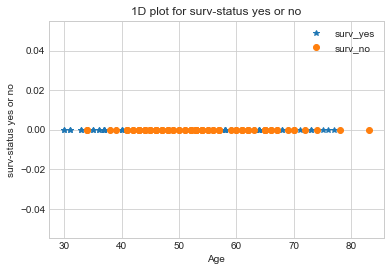

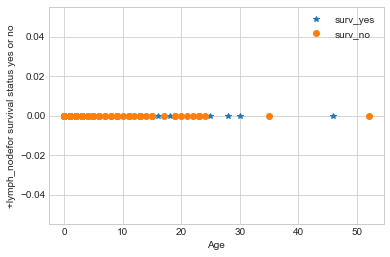

In [42]:
# 1D plot for surv-status yes or no
surv_yes = df12.loc[df12["surv_status"] == "yes"];
surv_no = df12.loc[df12["surv_status"] == "no"];

plt.plot(surv_yes["age"], np.zeros_like(surv_yes['age']), '*')
plt.plot(surv_no["age"], np.zeros_like(surv_no['age']), 'o')
plt.title('1D plot for surv-status yes or no')
plt.legend(['surv_yes','surv_no'],fancybox=True, shadow=True)
plt.xlabel('Age')
plt.ylabel('surv-status yes or no')
plt.show()

plt.plot(surv_yes["+lymph_node"], np.zeros_like(surv_yes['+lymph_node']), '*')
plt.plot(surv_no["+lymph_node"], np.zeros_like(surv_no['+lymph_node']), 'o')
#plt.title('1D plot for surv-status yes or no')
plt.legend(['surv_yes','surv_no'],fancybox=True, shadow=True)
plt.xlabel('Age')
plt.ylabel('+lymph_node for survival status yes or no')
plt.show()
#1D plot: too much of overlapping and  can't predict anything

#### observation:
* from 1 D scatter plot, surv-status yes or no with different age group points are overlapping each other.So we can't differentiate which age group has higher chances of survival.
* Survival status for +lymph_node  are also overlapping on 1 D scatter plot.so can't predict or differentiate the survival chances of patients.

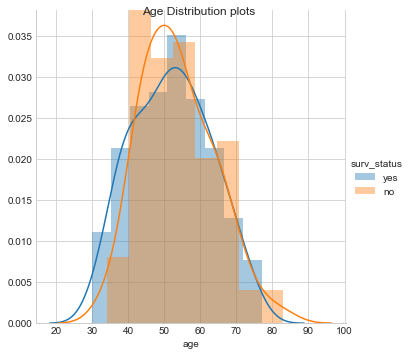

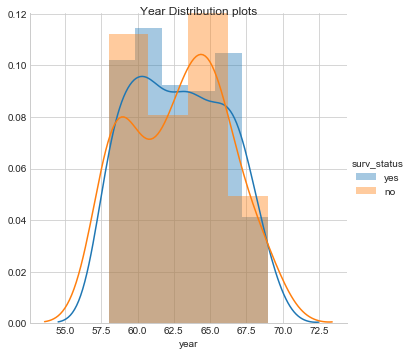

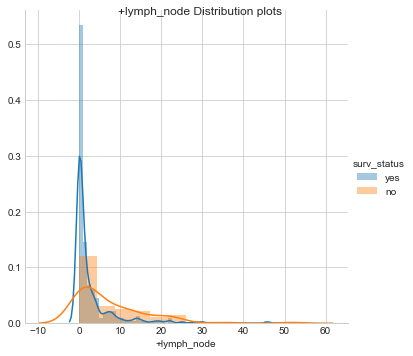

In [45]:
#Distribution plots
import warnings
warnings.filterwarnings('ignore')
print('\n')
gg=sns.FacetGrid(df12, hue="surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend()
gg.fig.suptitle('Age Distribution plots ')

plt.show()
print('\n')
gg1=sns.FacetGrid(df12, hue="surv_status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend()
gg1.fig.suptitle('Year Distribution plots ')
plt.show()
print('\n')
gg2=sns.FacetGrid(df12, hue="surv_status", size=5) \
   .map(sns.distplot, "+lymph_node") \
   .add_legend()
gg2.fig.suptitle('+lymph_node Distribution plots ')
plt.show()
#Here the height of the bar denotes the percentage of data points under the corresponding group

#### observations
* Distribution plots among the age,year and +lymph_node to check survival status.
* Here the height of the bar denotes the percentage of data points under the corresponding group i.e.(age,year and +lymph_node)
* In Age group,percentage of cancers patients lies in all kind of age group .The orage and blue curve and bars is widely spread.The spread of curve is high. it means varience is high which indicats that data points are widely spread among all kind of age group. we can conclude that the mostly survival of patients is not depend on age group and Patients can be survived at any age group.But From distribution plots,survival chances at age 30 to 35 is high as compared to other other age group. 
* In year group,year Distribution plots  is kind of similar to age distribution plots as varience is large and orage&blue curve and bars is widely spread.It means that cancer patient can be found at any year. The most number of cancer patient was survived during  1960 year .
* In +lymph_node group,+lymph_node Distribution plots clearly signifies the survial chances of cancer patients. If number of +lymph_node is less(varience is very small or almost negligible) ,cancer patients can be survived. The chances of survival of patient increase as Distribution plot's width is very small and hight is very high (varience is very small).If number of +lymph_node is high, chances of survival is less.In +lymph_node Distribution plots , it is plotted.

******************** age ********************

 PDF:= [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]

Bin_edges:= [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

CDF:= [0.04910714 0.15625    0.28125    0.375      0.54017857 0.70535714
 0.79910714 0.91071429 0.97321429 1.        ]


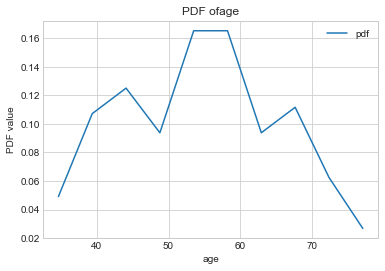

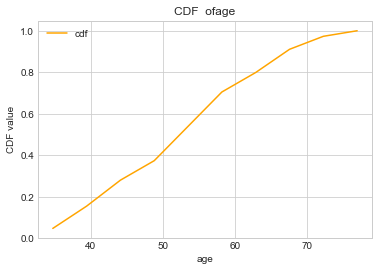

******************** year ********************

 PDF:= [0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]

Bin_edges:= [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

CDF:= [0.1875     0.29464286 0.39732143 0.46875    0.56696429 0.66517857
 0.73214286 0.83035714 0.92410714 1.        ]


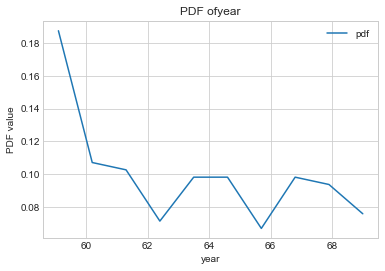

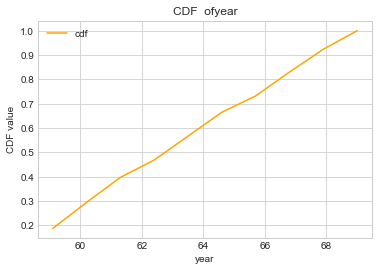

******************** +lymph_node ********************

 PDF:= [0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]

Bin_edges:= [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

CDF:= [0.83482143 0.91517857 0.9375     0.96428571 0.98214286 0.98660714
 0.99553571 0.99553571 0.99553571 1.        ]


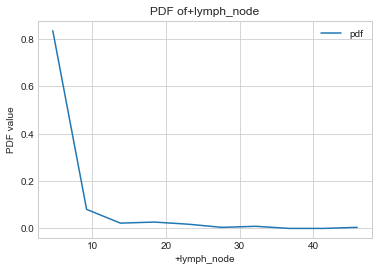

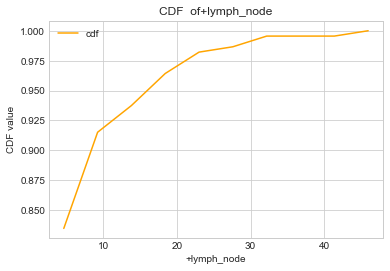

In [58]:
##  Cumulative Distribution Function (CDF)
#Plot CDF of surv_status

for i,j in enumerate(list(df12.columns [:-1])):
    
    cn, bin_edges = np.histogram(surv_yes[j], bins=10, 
                                 density = True)
    print('*'*20,j,'*'*20)
    pdf = cn/(sum(cn))
    print('\n PDF:=', pdf )
    print('\nBin_edges:=', bin_edges)
    #compute CDF
    cdf = np.cumsum(pdf)
    print("\nCDF:=",cdf)
    plt.plot(bin_edges[1:],pdf)
    plt.title('PDF of' +str(df12.columns[i]))
    plt.legend(['pdf'],fancybox=True, shadow=True)
    plt.xlabel(str(df12.columns[i]))
    plt.ylabel('PDF value')
    plt.show()
    plt.plot(bin_edges[1:], cdf,color='orange')
    plt.title('CDF  of' +str(df12.columns[i]))
    plt.legend(['cdf'],fancybox=True, shadow=True)
    plt.xlabel(str(df12.columns[i]))
    plt.ylabel('CDF value')
    plt.show()

#### Observation
* pdf and cdf Plots of surv_status among the age,year and +lymph_node.
* pdf plots of  the age,year and +lymph_node shows the probality distribution function of cancer patient's survival with which age group or year or number of +lymph_node are high or low .
* pdf of age group 45, 52 to 58 is high, it means survived patient in this age group was  found to be  high. while in cdf plot, chances of survival is very less after age 58.
* In year pdf and cdf plot , it is seen that survial staus of patients is maintained after year 1962.
* In +lymph_nodepdf and cdf plot, it is seen that if +lymph_node is high, survival status of patient is ver low. In pdf plot  when number of +lymph_node was below 11, survival graph is high and after that it gradually decreases.df graph was almost one after age of 70.

# Median, Percentile, Quantile, IQR, MAD:

In [64]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(surv_yes["age"]))
#Median with an outlier
print(np.median(np.append(surv_yes["age"],120))) # outlier is 120
print(np.median(surv_no["age"]))

print("\nQuantiles:")
print(np.percentile(surv_yes["age"],np.arange(0, 100, 25)))
print(np.percentile(surv_no["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(surv_yes["age"],90))
print(np.percentile(surv_no["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(surv_yes["age"]))
print(robust.mad(surv_no["age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


#### observations
* median valuein age group for surv_yes is 52 and it didn't change when outlier value=120 is added into data. median value of surv_no is 53 which nearby surv_yes.
* quantiles 0%,25%,50%,75% percentile of data. 50% percentile means median .And both are same here
* in 90% of age(= 67) has equal chance of syrvival and not survival.
* MAD for surv_yes =13.34, deviation around mediation of surv_yes  data is 13.34
and MAD for surv_no is nearly equal to 12



In [62]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(surv_yes["year"]))
#Median with an outlier
print(np.median(np.append(surv_yes["year"],2020))) # outlier is 120
print(np.median(surv_no["year"]))

print("\nQuantiles:")
print(np.percentile(surv_yes["year"],np.arange(0, 100, 25)))
print(np.percentile(surv_no["year"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(surv_yes["year"],90))
print(np.percentile(surv_no["year"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(surv_yes["year"]))
print(robust.mad(surv_no["year"]))



Medians:
63.0
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
4.447806655516806
4.447806655516806


#### observations
* median valuein year group for surv_yes is 63 and it didn't change when outlier value=2020 is added into data. median value of surv_no is 53 which nearby surv_yes.
* quantiles 0%,25%,50%,75% percentile of data. 50% percentile means median .And both are same here
* in 90% of year has equal chance of syrvival and not survival.
* MAD for surv_yes =4.44, deviation around mediation of surv_yes  data is 4.44
and MAD for surv_no is nearly equal to 4.44





In [17]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(surv_yes["+lymph_node"]))
#Median with an outlier
print(np.median(np.append(surv_yes["+lymph_node"],80))); # max size of lymph node is 52,assume outlier entry is 80
print(np.median(surv_no["+lymph_node"]))

print("\nQuantiles:")
print(np.percentile(surv_yes["+lymph_node"],np.arange(0, 100, 25)))
print(np.percentile(surv_no["+lymph_node"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(surv_yes["+lymph_node"],90))
print(np.percentile(surv_no["+lymph_node"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(surv_yes["+lymph_node"]))
print(robust.mad(surv_no["+lymph_node"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


In [18]:
print(df12['+lymph_node'].max())

52


#### observations
* median value in +lymph_node for surv_yes is 0 and it didn't change when outlier value=80 is added into data.median is zero,it means +lymph_node should be less. median value of surv_no is 4 .
* quantiles 0%,25%,50%,75% percentile of data. 50% percentile means median .And both are same here
* in 90% of +lymph_node is 8% for suv_yes of +lymph_node.It means less number of data is avaliable at 90% . 20% for surv_no +lymph_node data is available at 90%.
* MAD for surv_yes =0, deviation around mediation of surv_yes  data is 0
and MAD for surv_no is nearly equal to 5.93. No deviation for surv_yes and very small deviation for surv_no.



# Box plot and Whiskers

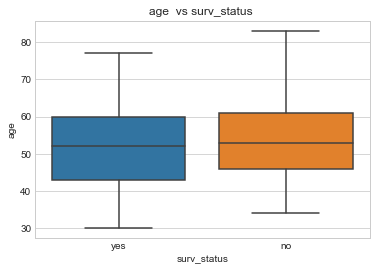

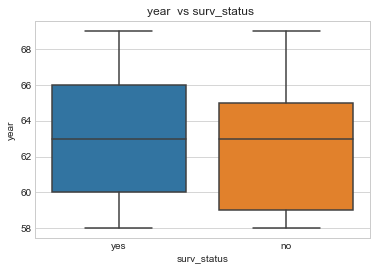

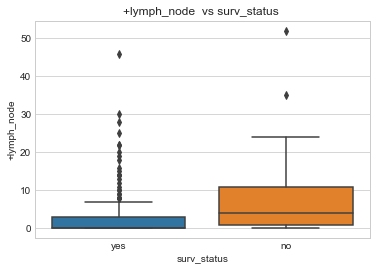

In [65]:
#Box-plot (visualized PDF on the side-ways)
for i,j in enumerate(list(df12.columns)[:-1]):
    plt.title(j + "  vs" + " surv_status ")
    sns.boxplot(x='surv_status',y= j , data=df12)
    plt.show()

#### Observations
* Box plot with whiskers for age ,year and +lymph_node are shown above.
* For age Box plot , 50% =52 and all quantiles ,survival surv_yes of age group lies between 42 to 60 & for surv_no lies on 48 to 62 age. whiskers which contain 1.5 times information of IQR(Inter quantile Range) is 30 to 42 age and 60 to 76 age for surv_yes. whiskers for surv_no is 35 to 41 and 61 to 90 age
* For year Box plot, median =50% is 63. quantiles for surv_yes is from year 1960 to 1966 and surv_no  is year 1959 to 1965. while whiskers for surv_yes is 1966 year to 1990 and surv_no is 1958 to 1959 and  1965 to 1990
* For +lymph_node Box plot,median =0 and quantiles are lied between 0 to 4 +lymph_node for surv_yes. while quantiles for surv_no lied between 1 to 11 and median is 4. 

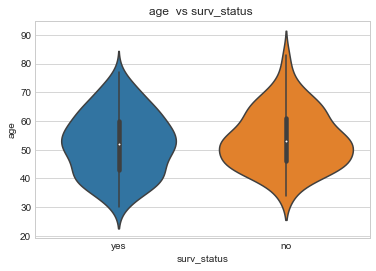

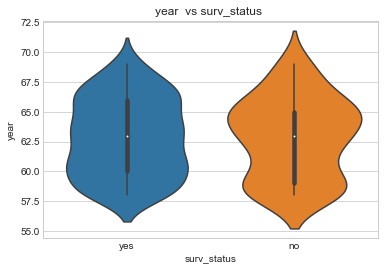

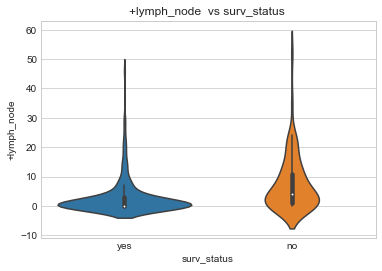

In [20]:
# violin plot
for i,j in enumerate(list(df12.columns)[:-1]):
    plt.title(j + "  vs" + " surv_status ")
    sns.violinplot(x='surv_status',y= j , data=df12, size=4)
    plt.show()

# Observations:
* In violin plot ,the number of positive auxillary lymph nodes of the survival patient is highly densed from 0 to 5
* Brest cancer predominantly found in age category from 40 to 60 (in violin and box plot) 
* denser region of age, year and +lymph_node are fatter and sparser ones are thinner as shown in above violin plots.
* Box plot with whiskers are inside the violin plot.

* Almost 84% of the patients have less than or equal to 9 positive lymph nodea. (#cdf )
* we visualized and analysised  the survival of patients  by performing  EDA operations on data.


## Results 
EDA(Exploratory Data Analysis) is performed on Haberman's Survival DataSet to analyze the dataset's with EDA techniques.The main objective to predict and analyze the data regarding the survival of patients who had undergone breast cancer based on the patient's age, year of treatment and the number of positive lymph nodes are successufully visualized and analysed.
The visualized plot helps to understand the data in more graceful mannar.

